[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/theonlyid/spectral/blob/release/1.1/docs/notebooks/python/data_example.ipynb)

# Example of spectral contrasting

This example demonstrates how to use the contrasting module for finding the frequency bands that provide maximal separation between two timeseries arrays.

In [ ]:

# Uncomment lines below and run this cell if running notebook from Google Colab

# clone repo from github
!git clone -b release/1.1 --depth 1 https://github.com/theonlyid/spectral.git

# install the package
%cd spectral
!python setup.py install
%cd ..

In [7]:
%cd neuraldatasets/

/mnt/c/Users/azaidi.000/development/neuraldatasets


In [2]:
# Temp code
import scipy.io as sio
f = sio.loadmat("EEG_v6.mat")
f.keys()

FileNotFoundError: [Errno 2] No such file or directory: '../../neuraldatasets/EEG_v6.mat'

In [1]:
# import depencies

import numpy as np
from spectral.contrast import decimate, contrast
from spectral.data_handling import *

In [7]:
params = TsParams(nperseg=64, noverlap=48)
da = DataArray(fs=1000, nchannels=10, ntrials=10, simulate=True)
ds = Dataset(da, params)

ds.data_array.data = decimate(ds.data_array.data, 10)

y = np.ones((ds.data_array.data.shape[-1]))
y[5:] = 0

snr, _ = contrast(ds, y, fs=100, nperseg=64, noverlap=48)

<ipython-input-8-814165c49cdd>:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(snr), origin='lower')


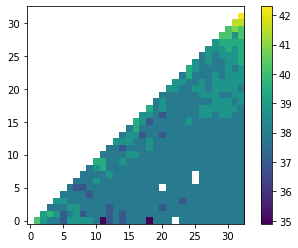

In [8]:
import matplotlib.pyplot as plt
plt.imshow(np.log(snr), origin='lower')
plt.colorbar()